### **Advertising Linear Regression**

The goal of our model is to map the relationship between the amount of advertising expenditure to amount of sales made.

**Dependencies**

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**The Dataset**

In [2]:
MY_DF = pd.read_csv(r'https://raw.githubusercontent.com/ST10437317/kpillay-firstrepo-vc/main/ST10437317_ADVERTISING_DATA.csv')
MY_DF

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


**Descriptive Statistics**

In [3]:
MY_DF.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Data Information**

In [4]:
MY_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Visualizations**

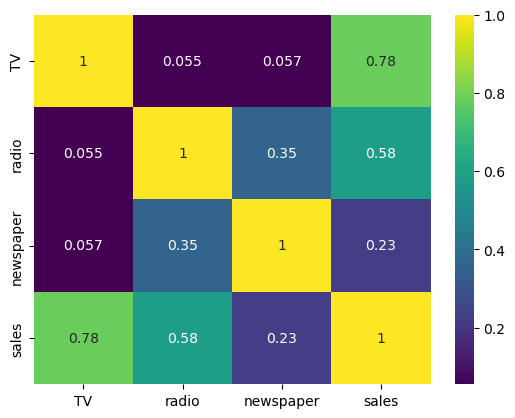

In [5]:
sns.heatmap(MY_DF.corr(), annot = True, cmap = "viridis");

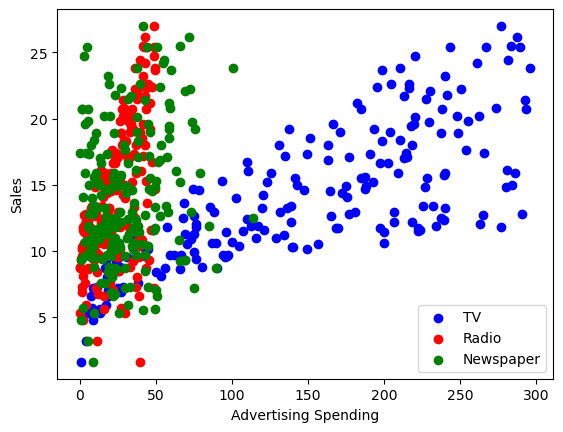

In [6]:
plt.scatter(MY_DF['TV'], MY_DF['sales'], color = 'blue', label = 'TV')
plt.scatter(MY_DF['radio'], MY_DF['sales'], color = 'red', label = 'Radio')
plt.scatter(MY_DF['newspaper'], MY_DF['sales'], color = 'green', label = 'Newspaper')
plt.xlabel('Advertising Spending')
plt.ylabel('Sales')
plt.legend()
plt.show()

**Feature Engineering**

Combining all advertising medium costs to form one total advertising expenditure column.

In [7]:
MY_DF['Total Spend'] = MY_DF['TV'] + MY_DF['radio'] + MY_DF['newspaper']
MY_DF

,TV,radio,newspaper,sales,Total Spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


**Training And Test Splits**

Extracting the `Total Spend` columns values to predict the `sales` value which is the y-variable.

In [8]:
X = MY_DF['Total Spend'].values
y = MY_DF["sales"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
pd.DataFrame(X).head(10)

,0
0,337.1
1,128.9
2,132.4
3,251.3
4,250.0
5,132.6
6,113.8
7,151.4
8,11.7
9,223.6


In [10]:
pd.DataFrame(y).head(10)

,0
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


**Model Instance And Fitting**

We use linear regression because we are trying to predict a continuous value.

In [11]:
LR_MODEL = LinearRegression()
LR_MODEL.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [12]:
LR_MODEL.fit(X_train.reshape(-1, 1), y_train);

These are the parameters for the line of best fit.

In [13]:
print(f'Gradient:  {LR_MODEL.coef_.item()}')
print(f'Intercept: {LR_MODEL.intercept_}')

Gradient:  0.04895709617593102
Intercept: 4.169512013489042


**Predictions**

In [14]:
y_preds = np.round(LR_MODEL.predict(X_test.reshape(-1, 1)), 1)
pd.DataFrame({'True Value' : y_test, 'Estimated Value' : y_preds})

,True Value,Estimated Value
0,16.9,16.3
1,22.4,18.7
2,21.4,22.0
3,7.3,8.8
4,24.7,17.5
5,12.6,12.1
6,22.3,18.3
7,8.4,8.1
8,11.5,15.9
9,14.9,15.4


Visualization showing the line of best fit mapping the testing data points.

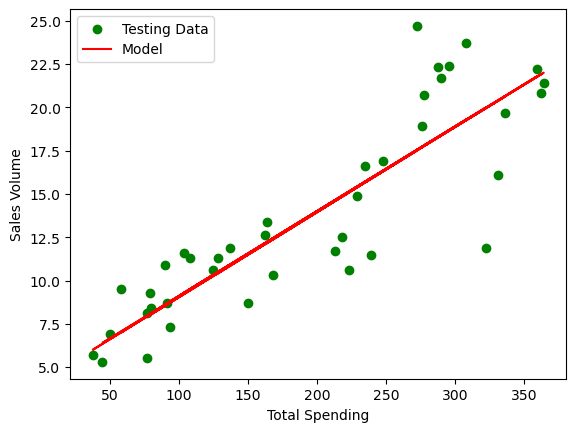

In [15]:
plt.scatter(X_test, y_test, color ='g', label = 'Testing Data')
plt.plot(X_test, y_preds, color ='r', label = 'Model')
plt.xlabel('Total Spending')
plt.ylabel('Sales Volume')
plt.legend()
plt.show()

**Additional: Determine the sales volume for 100 random values between 0 and 500.**

In [16]:
RAND_X = np.random.randint(0, 500, size = (100))
y_preds_rand = LR_MODEL.predict(RAND_X.reshape(-1, 1))
pd.DataFrame({'Total Spend' : RAND_X, 'Sales Volume' : np.round(y_preds_rand, 1)})

,Total Spend,Sales Volume
0,123,10.2
1,347,21.2
2,0,4.2
3,236,15.7
4,259,16.8
...,...,...
95,391,23.3
96,494,28.4
97,333,20.5
98,236,15.7


 **Additional: Determine the sales volume for a spend of 200**

In [17]:
X_value = np.array([200]).reshape(1, -1)
SALES_FOR_200 = LR_MODEL.predict(X_value)
print(f'Sales Volume For 200K Spend: {round(SALES_FOR_200.item(), 1)}')

Sales Volume For 200K Spend: 14.0
